In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Read all the dataframes

In [7]:
file_path = '/results/Actinokineospora/overall_codon_counts.csv'
overall_codon_count_df = pd.read_csv(file_path)

In [8]:
file_path = '/results/Actinokineospora/pivot_codon_counts_Actinokineospora.csv'
pivot_df = pd.read_csv(file_path, index_col = 'GCF_ID')

In [9]:
pivot_df.head()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCC,TCG,TCT,TGC,TGG,TGT,TTA,TTC,TTG,TTT
GCF_ID,,,,,,,,,,,,,,,,,,,,,
GCF_003182415,0.084665,1.697373,1.674499,0.043501,0.124086,4.932598,1.300086,0.077651,0.037817,1.271620,...,1.691872,1.664919,0.039009,0.725356,1.502328,0.028008,0.006784,2.784353,0.578030,0.033050
GCF_003663795,0.118355,1.821684,1.783752,0.055758,0.229369,4.877884,1.525570,0.176346,0.070712,1.397322,...,1.611418,1.804223,0.096927,0.696313,1.534779,0.062004,0.031093,2.733324,0.963887,0.042673
GCF_004362515,0.240408,1.948870,2.148217,0.125092,0.231330,4.142571,1.885230,0.215455,0.075279,1.408184,...,1.583323,1.929783,0.083472,0.708794,1.547616,0.098370,0.025093,2.881964,0.721317,0.083472
GCF_014648415,0.090054,1.708820,1.658357,0.054264,0.131185,4.094011,1.873439,0.091401,0.052724,1.337923,...,1.572007,1.678273,0.041179,0.763779,1.568784,0.045172,0.013999,2.780573,0.380230,0.034636
GCF_016907695,0.154366,1.882125,1.813870,0.065934,0.249182,4.792896,1.494334,0.185257,0.078433,1.430275,...,1.588213,1.778425,0.112449,0.705317,1.555447,0.062809,0.034105,2.751718,1.042217,0.058345


In [10]:
file_path = '/results/Actinokineospora/codon_positions_normalized.csv'
position_df = pd.read_csv(file_path)

In [17]:
position_df.head()

,Strain,Gene_ID,Codon,Relative_Position,Position_Bin
0,GCF_900111175,BMY07_RS33170,GCT,0.000000,0
1,GCF_900111175,BMY07_RS33170,GCG,0.185529,0
2,GCF_900111175,BMY07_RS33170,AAC,0.371058,0
3,GCF_900111175,BMY07_RS33170,GCA,0.556586,0
4,GCF_900111175,BMY07_RS33170,ACC,0.742115,0


In [12]:
output_folder = 'results/Actinokineospora/'

### Figure codes

### All codon location figure

In [13]:
# Add bins for relative positions (0-9)
position_df["Position_Bin"] = (position_df["Relative_Position"] // 10).astype(int)

# Count codon occurrences by bins
codon_bin_counts = position_df.groupby(["Codon", "Position_Bin"]).size().unstack(fill_value=0)

# Sort codons by overall frequency
codon_totals = codon_bin_counts.sum(axis=1).sort_values(ascending=False)
codon_bin_counts = codon_bin_counts.loc[codon_totals.index]

In [14]:
# Normalize counts for each codon by dividing by the row sum (total counts for each codon)
normalized_codon_bin_counts = codon_bin_counts.div(codon_bin_counts.sum(axis=1), axis=0)

In [15]:
file_path = '/results/Actinokineospora/normalized_codon_counts_Actinokineospora.csv'
normalized_codon_bin_counts.to_csv(file_path)

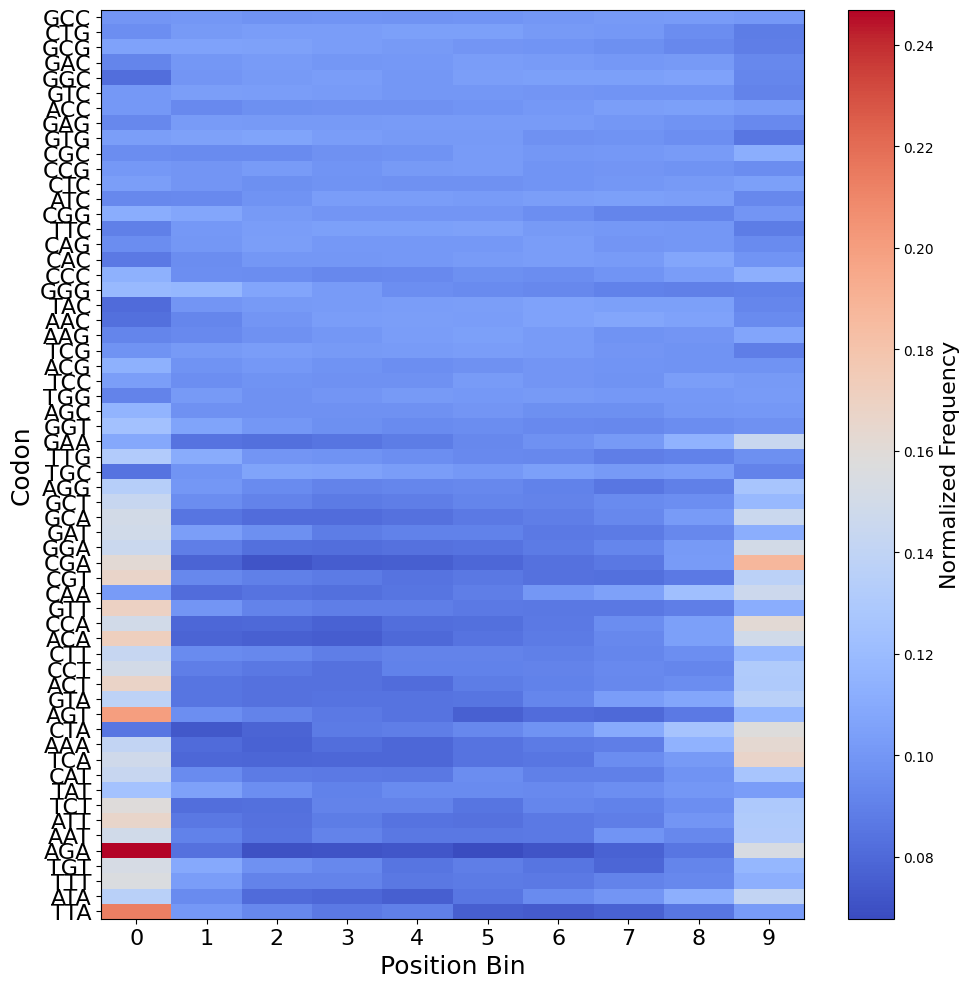

In [16]:
# Create a heatmap of normalized counts with larger text
plt.figure(figsize=(10, 10))
heatmap = plt.imshow(normalized_codon_bin_counts, aspect="auto", cmap="coolwarm")
cbar = plt.colorbar(heatmap)
cbar.set_label("Normalized Frequency", fontsize=16)  # Set colorbar label font size

# Adjust text sizes for axes
plt.xticks(
    ticks=np.arange(len(normalized_codon_bin_counts.columns)), 
    labels=normalized_codon_bin_counts.columns, 
    fontsize=16
)
plt.yticks(
    ticks=np.arange(len(normalized_codon_bin_counts.index)), 
    labels=normalized_codon_bin_counts.index, 
    fontsize=16
)
plt.xlabel("Position Bin", fontsize=18)
plt.ylabel("Codon", fontsize=18)

plt.tight_layout()

# Save and show the plot
plot_path = '/results/Actinokineospora/all_codon_positions_heatmap.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
